In [27]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('ggplot')

path = "/Users/casadei/dev/casadei/gsgp-mo/results"
approaches = [
    'random-without-replacement', 
    'kmeans'
]
classes = range(2, 6)
datasets = ['airfoil', 'ccn', 'concrete', 'keijzer-7', 'parkinsons', 'ppb', 
            'towerData','vladislavleva-1', 'vladislavleva-4', 'yacht']

strategies = ['current', 'random-without-replacement-2', 'random-without-replacement-3',
             'random-without-replacement-4', 'random-without-replacement-5', 'kmeans-2',
             'kmeans-3', 'kmeans-4', 'kmeans-5']

In [351]:
aggregation = np.mean
    
def compute_results(approaches, classes, dataset):
    results = {}
    
    print("Computing results of " + dataset)

    directory = "%s/%s/output-%s" % (path, 'current', dataset)
    
    results['current'] = {
        'tr': aggregation(pd.read_csv(directory + '/smart_tr_sanity.csv', header = None).iloc[:,1:], axis = 1),
        'ts': aggregation(pd.read_csv(directory + '/smart_ts_santity.csv', header = None).iloc[:,1:], axis = 1),
        'smartTr': pd.read_csv(directory + '/smart_tr_fitness.csv', header = None).iloc[:,-1],
        'smartTs': pd.read_csv(directory + '/smart_ts_fitness.csv', header = None).iloc[:,-1]
    }
    
    for approach in approaches:
        for k in classes:
            directory = "%s/%s-%d/output-%s" % (path, approach, k, dataset)
            cols = list(range(0, k))
            strategy = "%s-%d" % (approach, k)
            results[strategy] = {
                'tr': aggregation(pd.read_csv(directory + '/smart_tr_sanity.csv', header = None, usecols = cols).iloc[:,1:], axis = 1),
                'ts': aggregation(pd.read_csv(directory + '/smart_ts_santity.csv', header = None, usecols = cols).iloc[:,1:], axis = 1),
                'smartTr': pd.read_csv(directory + '/smart_tr_fitness.csv', header = None).iloc[:,-1],
                'smartTs': pd.read_csv(directory + '/smart_ts_fitness.csv', header = None).iloc[:,-1]
            }
        
    return results

def compute_all(approaches, classes, datasets):
    results = {}
    
    for dataset in datasets:
        results[dataset] = compute_results(approaches, classes, dataset)
    
    return results

In [352]:
results = compute_all(approaches, classes, datasets)

Computing results of airfoil
Computing results of ccn
Computing results of concrete
Computing results of keijzer-7
Computing results of parkinsons
Computing results of ppb
Computing results of towerData
Computing results of vladislavleva-1
Computing results of vladislavleva-4
Computing results of yacht


In [353]:
def median(arr):
    arr[~np.isfinite(arr)] = 0
    return np.median(arr)

def fill_graph(results, graph, dataset, mode):
    if (mode == 'training'):
        columns = ('tr', 'smartTr')
    else:
        columns = ('ts', 'smartTs')

    current = []
    random_aggr = []
    random_smart = []
    kmeans_aggr = []
    kmeans_smart = []

    for k in classes:
        current.append(median(results[dataset]['current'][columns[0]]))
        random_aggr.append(median(results[dataset]['random-without-replacement-' + str(k)][columns[0]]))
        random_smart.append(median(results[dataset]['random-without-replacement-' + str(k)][columns[1]]))
        kmeans_aggr.append(median(results[dataset]['kmeans-' + str(k)][columns[0]]))
        kmeans_smart.append(median(results[dataset]['kmeans-' + str(k)][columns[1]]))


    graph.title(mode)
    graph.plot(classes, current, linestyle="dashed", color='gray', label='Single Objective', alpha=0.5)
    graph.plot(classes, random_aggr, color='red', label='Random MO Aggregated', alpha=0.5)
    graph.plot(classes, random_smart, color='red', linestyle="dotted", label='Random MO Smart', alpha=0.5)
    graph.plot(classes, kmeans_aggr, color='blue', label='KMeans MO Aggregated', alpha=0.5)
    graph.plot(classes, kmeans_smart, color='blue', linestyle="dotted", label='KMeans MO Smart', alpha=0.5)
    graph.xticks(classes, [2, 3, 4, 5])
    graph.yscale('log')
    graph.legend()
    
    return graph

def fill_dataset_graph(results, dataset):
    fig = plt.figure()
    fig.suptitle(dataset, fontsize="x-large")
    plt.subplot(1, 2, 1)
    fill_graph(results, plt, dataset, 'training')
    plt.subplot(1, 2, 2)
    fill_graph(results, plt, dataset, 'test')
    plt.show()
    

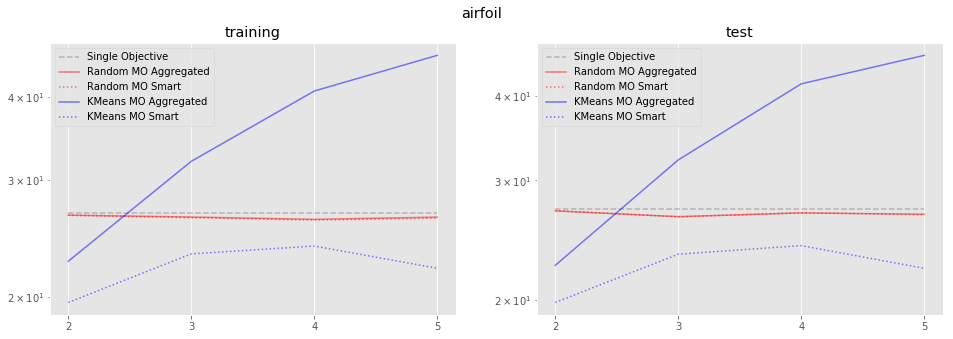

In [354]:
fill_dataset_graph(results, 'airfoil')

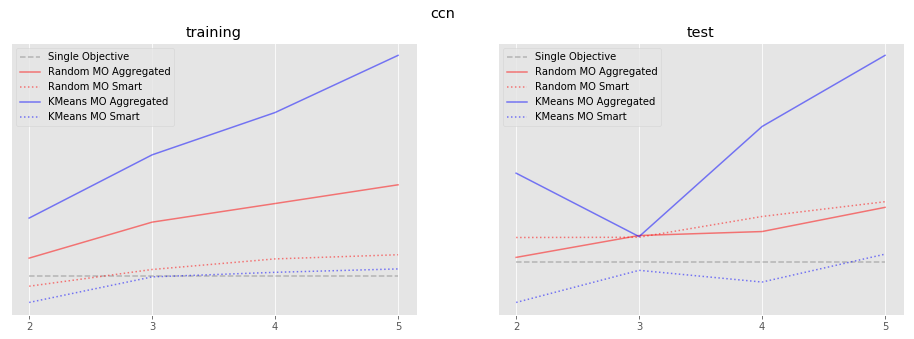

In [355]:
fill_dataset_graph(results, 'ccn')

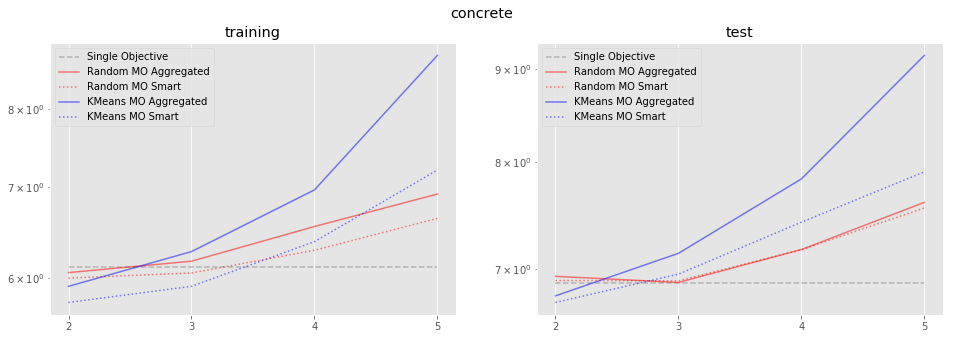

In [356]:
fill_dataset_graph(results, 'concrete')

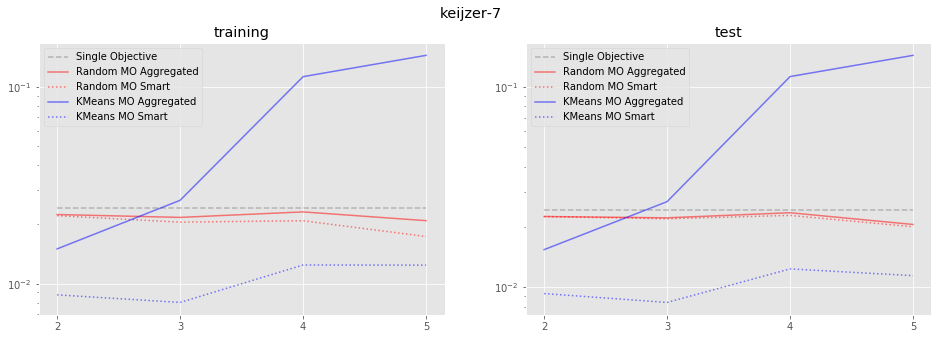

In [357]:
fill_dataset_graph(results, 'keijzer-7')

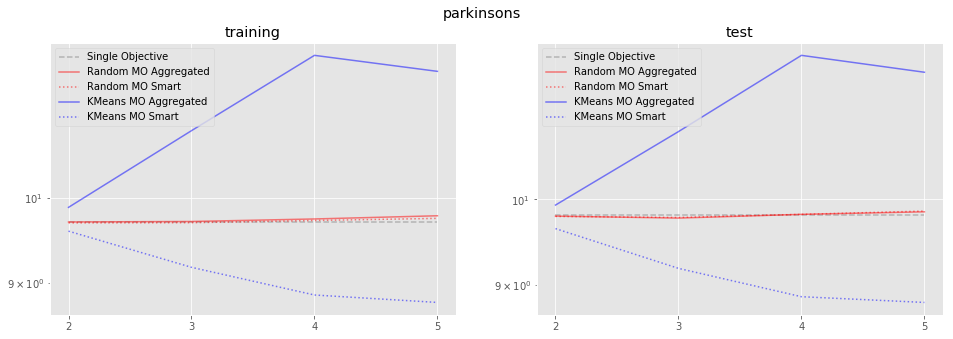

In [358]:
fill_dataset_graph(results, 'parkinsons')

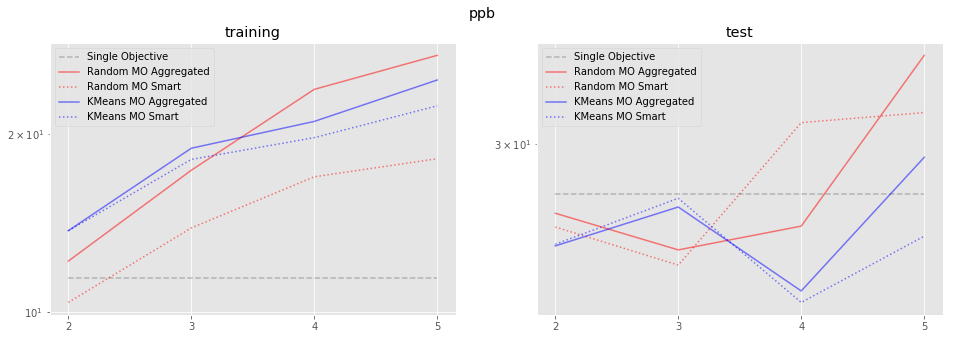

In [359]:
fill_dataset_graph(results, 'ppb')

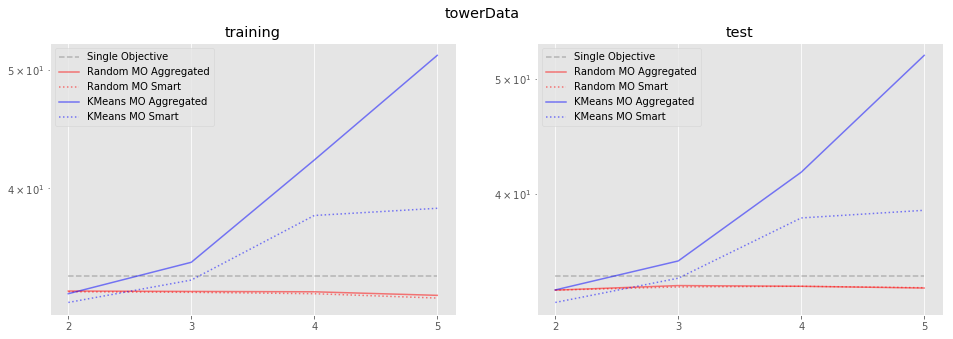

In [360]:
fill_dataset_graph(results, 'towerData')

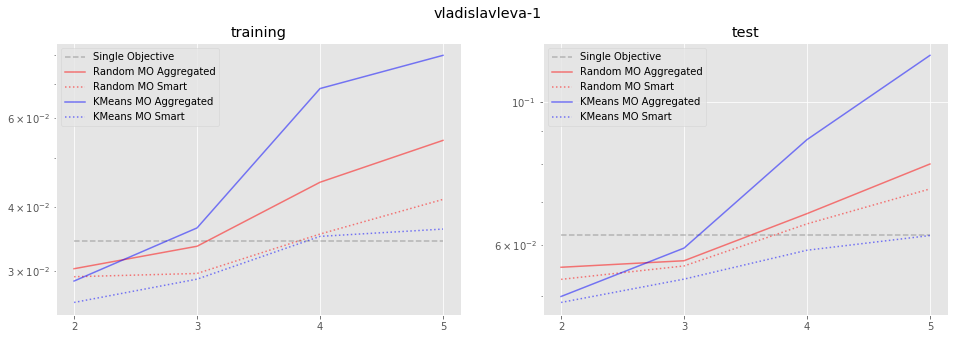

In [361]:
fill_dataset_graph(results, 'vladislavleva-1')

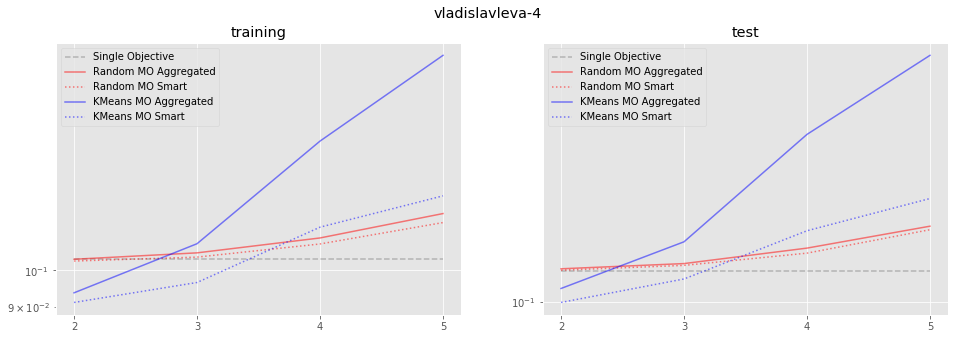

In [362]:
fill_dataset_graph(results, 'vladislavleva-4')

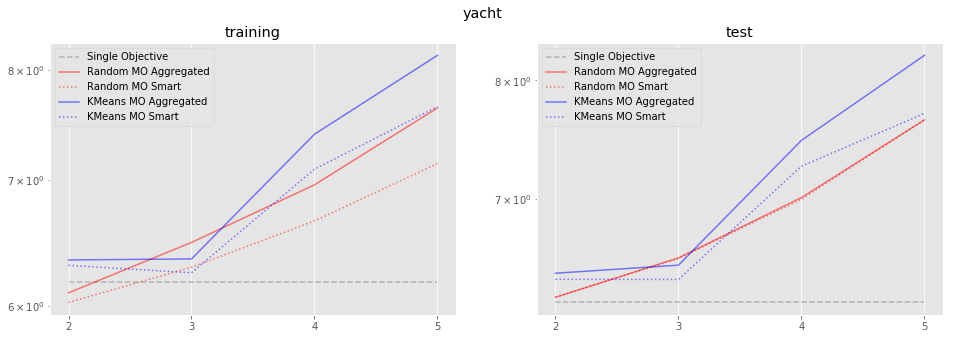

In [367]:
fill_dataset_graph(results, 'yacht')

In [364]:
data = []
for dataset in datasets:
    for strategy in strategies:
        data.append([
            dataset,
            strategy,
            median(results[dataset][strategy]['tr']),
            median(results[dataset][strategy]['smartTr']),
            median(results[dataset][strategy]['ts']),
            median(results[dataset][strategy]['smartTs'])
        ])

columns = ('Dataset', 'Strategy', 'Aggr. TR Fitness', 'Smart TR Fitness', 'Aggr TS Fitness', 'Smart TS Fitness')
df = pd.DataFrame(data=data, columns = columns)
df

,Dataset,Strategy,Aggr. TR Fitness,Smart TR Fitness,Aggr TS Fitness,Smart TS Fitness
0,airfoil,current,26.741455,26.741455,27.266555,27.266555
1,airfoil,random-without-replacement-2,26.560960,26.535685,27.042415,27.069140
2,airfoil,random-without-replacement-3,26.386023,26.323990,26.521415,26.503310
3,airfoil,random-without-replacement-4,26.174183,26.102040,26.858545,26.874380
4,airfoil,random-without-replacement-5,26.376616,26.288460,26.737868,26.695115
5,airfoil,kmeans-2,22.635455,19.617190,22.471710,19.801790
6,airfoil,kmeans-3,32.013580,23.218170,32.174027,23.335025
7,airfoil,kmeans-4,40.858768,23.858915,41.687942,24.030810
8,airfoil,kmeans-5,46.242785,22.090135,45.931831,22.243365
9,ccn,current,0.132155,0.132155,0.138540,0.138540


In [366]:
from scipy import stats

source = ('current', 'ts')
target = ('kmeans-2', 'smartTs')
data = []

for dataset in datasets:
    x = results[dataset][source[0]][source[1]]
    y = results[dataset][target[0]][target[1]]
    p = stats.wilcoxon(x, y, )
    data.append([dataset, median(x), median(y), "%0.2f" % p.pvalue])

columns = ('Dataset', source[0] + ' ts', target[0] + ' ts', 'p-value')
df = pd.DataFrame(data=data, columns = columns)
df

,Dataset,current ts,kmeans-2 ts,p-value
0,airfoil,27.266555,19.801790,0.00
1,ccn,0.138540,0.136795,0.38
2,concrete,6.875400,6.709915,0.24
3,keijzer-7,0.024380,0.009285,0.00
4,parkinsons,9.806340,9.648450,0.00
5,ppb,29.348485,28.705425,0.48
6,towerData,34.158980,32.429520,0.00
7,vladislavleva-1,0.062225,0.048855,0.00
8,vladislavleva-4,0.108340,0.099940,0.00
9,yacht,6.232185,6.396660,0.84
